In [1]:
!pip install xgboost #to work upon extreme boosting algrthm
import pandas as pd #for data manipulation
import numpy as np #for mathematical functions
import matplotlib.pyplot as plt #visualisation
from sklearn.model_selection import GridSearchCV, train_test_split
#sklearn.model_selection model includes packages such as gridsearchcv to perfom 
#hyperparameter tuning and train_Test_split for splitting train and test data
from sklearn.tree import DecisionTreeClassifier #for dt class
from sklearn.linear_model import LogisticRegression #for stacking approach
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier #importing techniques
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('Fraud_check.csv',encoding='latin1')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [4]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
df=data.copy()
df.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES


In [6]:
df.insert(6,'tax_class'," ")

for i in range(0,len(df['Taxable.Income']),1):
    if df['Taxable.Income'].iloc[i]<=30000:
        df['tax_class'].iloc[i]='Risky'
    else:
        df['tax_class'].iloc[i]='Good'

In [7]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [8]:
df.tax_class.value_counts()

Good     476
Risky    124
Name: tax_class, dtype: int64

In [9]:
df.drop(['Taxable.Income'],axis=1,inplace=True)
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [10]:
from sklearn import preprocessing

# Encode categorical variables
label_encoder = preprocessing.LabelEncoder()
df['Undergrad'] = label_encoder.fit_transform(df['Undergrad'])
df['Marital.Status'] = label_encoder.fit_transform(df['Marital.Status'])
df['Urban'] = label_encoder.fit_transform(df['Urban'])
df['tax_class'] = label_encoder.fit_transform(df['tax_class'])


In [11]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import preprocessing

In [13]:
df.iloc[:,2:4]=StandardScaler().fit_transform(df.iloc[:,2:4])
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0
2,0,1,1.033109,1.634639,1,0
3,1,2,1.696831,-0.063197,1,0
4,0,1,-1.630532,1.408261,0,0
...,...,...,...,...,...,...
595,1,0,-1.390432,-0.968710,1,0
596,1,0,-1.071672,-1.534655,1,0
597,0,0,0.909696,-1.761033,1,0
598,1,1,1.432197,0.163181,0,0


In [14]:
x=df.iloc[:,0:-1]
y=df['tax_class']
y.value_counts()

0    476
1    124
Name: tax_class, dtype: int64

In [15]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,-1.178521,-0.629143,1
1,1,0,0.508500,0.276370,1
2,0,1,1.033109,1.634639,1
3,1,2,1.696831,-0.063197,1
4,0,1,-1.630532,1.408261,0
...,...,...,...,...,...
595,1,0,-1.390432,-0.968710,1
596,1,0,-1.071672,-1.534655,1
597,0,0,0.909696,-1.761033,1
598,1,1,1.432197,0.163181,0


In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax_class, Length: 600, dtype: int64

In [17]:
#Model building using Random forest

In [18]:
#Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
# Model training and evaluation
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Bagging Classifier': BaggingClassifier(estimator=LogisticRegression(), n_estimators=50),
    'XGBoost': XGBClassifier()
}

In [20]:
for name, model in models.items():
    print(f"\n{name}:")
    model.fit(x_train, y_train)
    train_accuracy = model.score(x_train, y_train)
    test_accuracy = model.score(x_test, y_test)
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    pred = model.predict(x_test)
    print(classification_report(y_test, pred))



Random Forest:
Train Accuracy: 1.0000
Test Accuracy: 0.7667
              precision    recall  f1-score   support

           0       0.78      0.98      0.87        94
           1       0.00      0.00      0.00        26

    accuracy                           0.77       120
   macro avg       0.39      0.49      0.43       120
weighted avg       0.61      0.77      0.68       120


Gradient Boosting:
Train Accuracy: 0.8812
Test Accuracy: 0.7583
              precision    recall  f1-score   support

           0       0.78      0.96      0.86        94
           1       0.20      0.04      0.06        26

    accuracy                           0.76       120
   macro avg       0.49      0.50      0.46       120
weighted avg       0.66      0.76      0.69       120


Bagging Classifier:
Train Accuracy: 0.7958
Test Accuracy: 0.7833
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        94
           1       0.00      0.00      0.00  

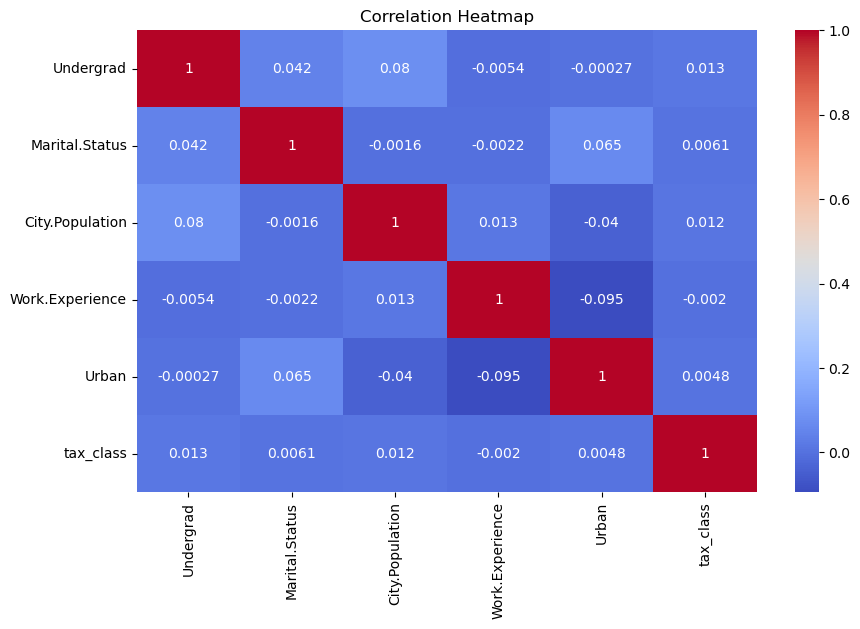

In [21]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

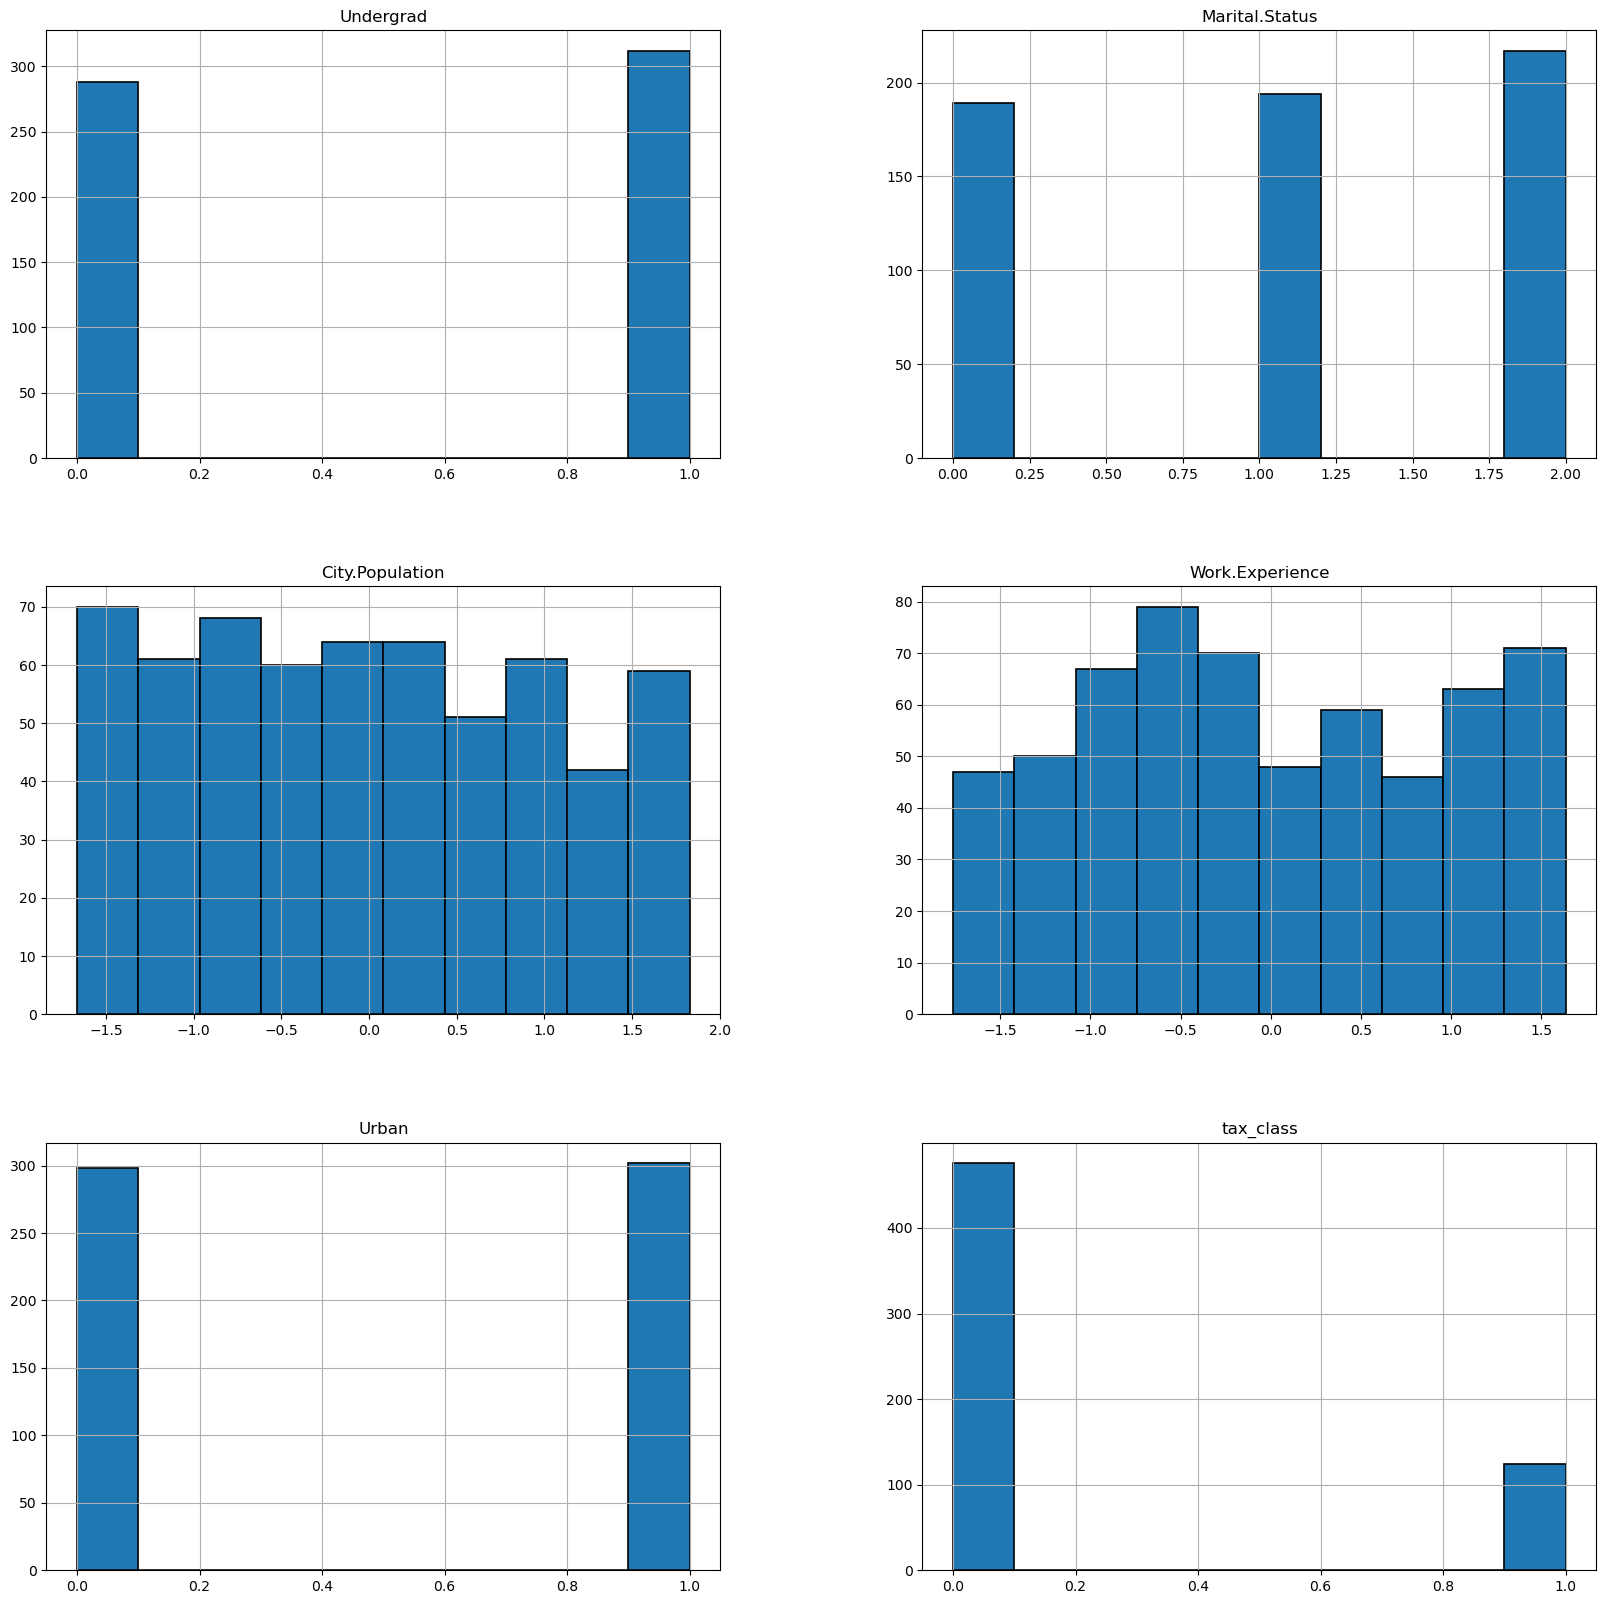

In [22]:
# Histograms of Features
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))
plt.show()

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


In [25]:
#Applying K-Fold cross Validation

In [26]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=10, shuffle=True, random_state=42)

In [27]:
rf_params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [28]:
xgb_params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.5, 0.6, 0.7, 0.9, 1],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [29]:
# Create instances of the models
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()

In [30]:
models = {
    'Random Forest': (rf_model, rf_params),
    'XGBoost': (xgb_model, xgb_params)
}

In [ ]:
best_models = {}
for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=kfold, n_jobs=-1)
    grid.fit(x_train_resampled, y_train_resampled)
    best_models[name] = grid.best_estimator_


In [ ]:
# Evaluate best models
for name, model in best_models.items():
    print(f"\n{name}:")
    train_accuracy = model.score(x_train_resampled, y_train_resampled)
    test_accuracy = model.score(x_test, y_test)
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    pred = model.predict(x_test)
    print(classification_report(y_test, pred))